Information about data:
  
  -> The MNIST dataset is in built in Tensor Flow Tutorials or we can get from Kaggle
  
  -> The dataset contains of Hand written digits and their corresponding class lables 

Objective:

-> To perform Multi Layer Perceptron on the MNIST dataset

-> To introduce different optimization algorithms like Gradient Descent,  Stochastic Gradient      Descent, Adadelta, Adam

-> To introduce different initializations of weights like Xavier, He

-> To try different activation functions like RELU, Sigmoid, Tanh

-> To introduce Batch Normalization

-> To introduce Drop out 

-> To analyze the weights for each model

                -> Importing the required libraries
                   
                -> Importing the in built dataset from Tensor Flow

In [3]:
import tensorflow as tf
import matplotlib.pyplot as mp
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets("MNIST_data/", one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

                 -> Dynamic plot function

In [0]:
def dynamic_plot(x, y, y_1, ax, ticks,title, colors=['b']):
    ax.plot(x, y, 'b', label="Train Loss")
    ax.plot(x, y_1, 'r', label="Test Loss")
    if len(x)==1:
        mp.legend()
        mp.title(title)
    mp.yticks(ticks)
    fig.canvas.draw()

               Train and Test data

In [5]:
print(data.train.images.shape)
print(data.test.images.shape)
print(data.train.labels.shape)
print(data.test.labels.shape)

(55000, 784)
(10000, 784)
(55000, 10)
(10000, 10)


In [6]:
print('The number of data point in training are:',data.train.images.shape[0],"and number of features for each data point are",data.train.images.shape[1])
print('The number of data point to test  are:',data.test.images.shape[0],"and number of features for each data point are",data.test.images.shape[1])
print("The shape of the class labels in the train and test dataset after appling One Hot Encoding on the class labels")
print("The number of class labels in training are:",data.train.labels.shape[0],"and each class label is of:",data.train.labels.shape[1],"dimensions")
print("The number of class labels in training are:",data.test.labels.shape[0],"and each class label is of:",data.test.labels.shape[1],"dimensions")

The number of data point in training are: 55000 and number of features for each data point are 784
The number of data point to test  are: 10000 and number of features for each data point are 784
The shape of the class labels in the train and test dataset after appling One Hot Encoding on the class labels
The number of class labels in training are: 55000 and each class label is of: 10 dimensions
The number of class labels in training are: 10000 and each class label is of: 10 dimensions


                NETWORK PARAMETERS:
                 
                                   -> Number of hidden layers
                                   
                                   -> Number of Neurons in each Layer
                                   
                                   -> The input is of 784 Dimension
                                   
                                   -> The output is a SOFTMAX classifier with 10 class labels

In [0]:
n_hidden_1 = 512
n_hidden_2 = 128
n_input = 784
n_output = 10

              Variables and Place holders

In [0]:
x = tf.placeholder(tf.float32, [None,784])
y_ = tf.placeholder(tf.float32, [None,10])
prob = tf.placeholder(tf.float32) ##### place holder for drop out of input
prob_input = tf.placeholder(tf.float32) ##### place holder for drop out of output
keep_prob = tf.placeholder(tf.float32)
keep_prob_input = tf.placeholder(tf.float32)

              Initializing Weights and Bias using different initialization algorithms like Xavier/Glorot, He
              
                        -> Xavier/Glorot weight initialization for SGD
                        
                        -> He weight initialization for ReLU

In [0]:
sgd_weights = {
    'h1' : tf.Variable(tf.random_normal([n_input,n_hidden_1],stddev=0.039,mean=0)),  # 784*512 # sqrt(2/(784+512)) = 0.039
    'h2' : tf.Variable(tf.random_normal([n_hidden_1,n_hidden_2],stddev=0.055,mean=0)), # 512*128 # sqrt(2/(512+128)) = 0.055
    'out': tf.Variable(tf.random_normal([n_hidden_2,n_output],stddev=0.120,mean = 0))  # 128*10 #sqrt(2/(128+10)) = 0.120
}

relu_weights = {
    'h1' : tf.Variable(tf.random_normal([n_input,n_hidden_1],stddev=0.062,mean=0)),  # 784*512 # sqrt(2/(784+1)) = 0.062
    'h2' : tf.Variable(tf.random_normal([n_hidden_1,n_hidden_2],stddev=0.125,mean=0)), # 512*128 # sqrt(2/(512+1)) = 0.125
    'out': tf.Variable(tf.random_normal([n_hidden_2,n_output],stddev=0.120,mean = 0))  # 128*10 #sqrt(2/(128+1)) = 0.120
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),         
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),             
    'out': tf.Variable(tf.random_normal([n_output]))              
}

              PARAMETERS

In [0]:
training_epochs = 25
learning_rate = 0.05
batch_size = 1000
display_step = 1

              Model 1: INPUT (784) - SIGMOID(512) - SIGMOID(128) - SIGMOID(output 10) 
               
                          -> Sigmoid Activation for hidden layers

In [0]:
def mulit_layer_perceptron(x,weights,biases):
  print('Input layer')
  print("X:", x.get_shape(), "W[h1]:", weights['h1'].get_shape(), 'b[h1]:', biases['b1'].get_shape())
  
  print('Hidden layer 1 with Sigmoid Activation')
  layer_1 = tf.add(tf.matmul(x,weights['h1']),biases['b1'])
  layer_1 - tf.nn.sigmoid(layer_1)
  print("Layer_1:", layer_1.get_shape(), 'W[h2]:', weights['h2'].get_shape, 'b[b1]:', biases['b2'].get_shape())
  
  print("Hidden layer 2 with Sigmoid Activation")
  layer_2 = tf.add(tf.matmul(layer_1,weights['h2']),biases['b2'])
  layer_2 - tf.nn.sigmoid(layer_2)
  print("Layer_2:", layer_2.get_shape(), 'W[out]:', weights['out'].get_shape, 'b3:', biases['out'].get_shape())  
  
  print("Output layer")
  output_layer = tf.matmul(layer_2,weights['out']) + biases['out']
  output_layer = tf.nn.sigmoid(output_layer)
  print('Output Layer:', output_layer.get_shape())
  
  return output_layer
  
  

              MODEL 1 + ADAM OPTIMIZER

Input layer
X: (?, 784) W[h1]: (784, 512) b[h1]: (512,)
Hidden layer 1 with Sigmoid Activation
Layer_1: (?, 512) W[h2]: <bound method Variable.get_shape of <tf.Variable 'Variable_9:0' shape=(512, 128) dtype=float32_ref>> b[b1]: (128,)
Hidden layer 2 with Sigmoid Activation
Layer_2: (?, 128) W[out]: <bound method Variable.get_shape of <tf.Variable 'Variable_10:0' shape=(128, 10) dtype=float32_ref>> b3: (10,)
Output layer
Output Layer: (?, 10)
Epoch: 0001 train cost=2.380851776 test cost=2.383974218
Epoch: 0002 train cost=2.390954169 test cost=2.386933439
Epoch: 0003 train cost=2.421044302 test cost=2.421044510
Epoch: 0004 train cost=2.416726303 test cost=2.419485166
Epoch: 0005 train cost=2.420288840 test cost=2.419811010
Epoch: 0006 train cost=2.414657515 test cost=2.416858786
Epoch: 0007 train cost=2.418963445 test cost=2.416482449
Epoch: 0008 train cost=2.414868160 test cost=2.416482449
Epoch: 0009 train cost=2.417286340 test cost=2.416482449
Epoch: 0010 train cost=2.416559072 test c

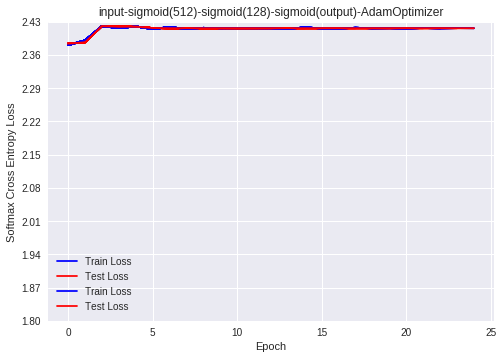

In [33]:
y_sgd = mulit_layer_perceptron(x,sgd_weights,biases)
cost_sgd = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_sgd, labels = y_))
adam_optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost_sgd)
sgd_optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost_sgd)

with tf.Session() as sess:
  tf.global_variables_initializer().run()
  fig,ax = mp.subplots(1,1)
  ax.set_xlabel('Epoch')
  ax.set_ylabel("Softmax Cross Entropy Loss")
  epchs, ytrainloss, ytestloss = [], [], []
  for epoch in range(training_epochs):
    train_avg_cost = 0
    test_avg_cost = 0
    number_of_batches = int(data.train.num_examples/batch_size)
    
    for i in range(number_of_batches):
      xs_batch, ys_batch = data.train.next_batch(batch_size)
      _,c,w = sess.run([adam_optimizer,cost_sgd,sgd_weights],feed_dict = {x:xs_batch, y_:ys_batch})
      train_avg_cost += c/number_of_batches
      c = sess.run(cost_sgd, feed_dict = {x: data.test.images, y_: data.test.labels})
      test_avg_cost  += c/number_of_batches
    epchs.append(epoch)
    ytrainloss.append(train_avg_cost)
    ytestloss.append(test_avg_cost)
    dynamic_plot(epchs, ytrainloss, ytestloss, ax, np.arange(1.8, 2.5, step=0.07), "input-sigmoid(512)-sigmoid(128)-sigmoid(output)-AdamOptimizer")
    
    if epoch%display_step == 0:
      print("Epoch:", '%04d' % (epoch+1), "train cost={:.9f}".format(train_avg_cost), "test cost={:.9f}".format(test_avg_cost))
    dynamic_plot(epchs, ytrainloss, ytestloss, ax, np.arange(1.8, 2.5, step=0.07), "input-sigmoid(512)-sigmoid(128)-sigmoid(output)-AdamOptimizer")
  correct_prediction = tf.equal(tf.argmax(y_sgd,1), tf.argmax(y_,1))
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
  print("Accuracy:", accuracy.eval({x: data.test.images, y_: data.test.labels}))
    
      
    

              DISTRIBUTION OF WEIGHTS AT THE END OF TRAINING

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


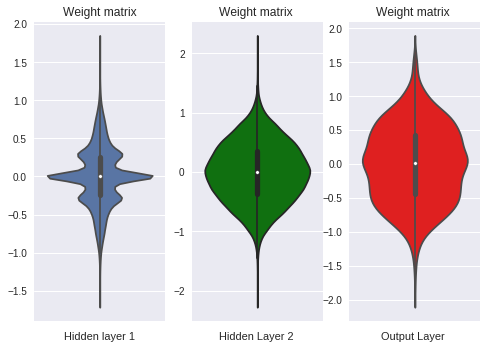

In [36]:
import seaborn as s

h1_w = w['h1'].flatten().reshape(-1,1)
h2_w = w['h2'].flatten().reshape(-1,1)
out_w = w['out'].flatten().reshape(-1,1)

fig = mp.figure()
mp.subplot(1,3,1)
mp.title("Weight matrix")
ax = s.violinplot(y = h1_w, clolr = 'b')
mp.xlabel("Hidden layer 1")


mp.subplot(1, 3, 2)
mp.title("Weight matrix ")
ax = s.violinplot(y=h2_w, color='g')
mp.xlabel('Hidden Layer 2 ')

mp.subplot(1, 3, 3)
mp.title("Weight matrix ")
ax = s.violinplot(y=out_w,color='r')
mp.xlabel('Output Layer ')
mp.show()

              MODEL 1 + GRADIENT DESCENT OPTIMIZER

Input layer
X: (?, 784) W[h1]: (784, 512) b[h1]: (512,)
Hidden layer 1 with Sigmoid Activation
Layer_1: (?, 512) W[h2]: <bound method Variable.get_shape of <tf.Variable 'Variable_9:0' shape=(512, 128) dtype=float32_ref>> b[b1]: (128,)
Hidden layer 2 with Sigmoid Activation
Layer_2: (?, 128) W[out]: <bound method Variable.get_shape of <tf.Variable 'Variable_10:0' shape=(128, 10) dtype=float32_ref>> b3: (10,)
Output layer
Output Layer: (?, 10)
Epoch: 0001 train cost=2.043193551 test cost=2.029072599
Epoch: 0002 train cost=1.828018275 test cost=1.818836763
Epoch: 0003 train cost=1.758738297 test cost=1.750763631
Epoch: 0004 train cost=1.723038485 test cost=1.715592033
Epoch: 0005 train cost=1.699364166 test cost=1.692855772
Epoch: 0006 train cost=1.684273349 test cost=1.676451995
Epoch: 0007 train cost=1.670672937 test cost=1.663909405
Epoch: 0008 train cost=1.660386177 test cost=1.653847081
Epoch: 0009 train cost=1.652663500 test cost=1.645478160
Epoch: 0010 train cost=1.644776596 test c

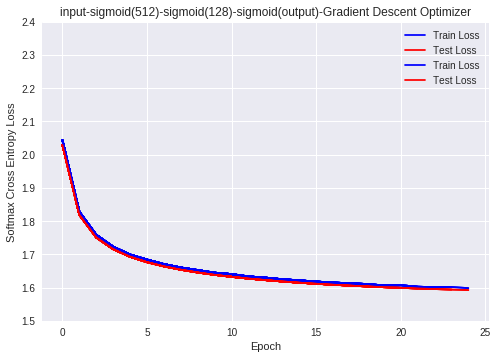

In [40]:
y_sgd = mulit_layer_perceptron(x,sgd_weights,biases)
cost_sgd = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_sgd, labels = y_))
adam_optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost_sgd)
sgd_optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost_sgd)

with tf.Session() as sess:
  tf.global_variables_initializer().run()
  fig,ax = mp.subplots(1,1)
  ax.set_xlabel('Epoch')
  ax.set_ylabel("Softmax Cross Entropy Loss")
  epchs, ytrainloss, ytestloss = [], [], []
  for epoch in range(training_epochs):
    train_avg_cost = 0
    test_avg_cost = 0
    number_of_batches = int(data.train.num_examples/batch_size)
    
    for i in range(number_of_batches):
      xs_batch, ys_batch = data.train.next_batch(batch_size)
      _,c,w = sess.run([sgd_optimizer,cost_sgd,sgd_weights],feed_dict = {x:xs_batch, y_:ys_batch})
      train_avg_cost += c/number_of_batches
      c = sess.run(cost_sgd, feed_dict = {x: data.test.images, y_: data.test.labels})
      test_avg_cost  += c/number_of_batches
    epchs.append(epoch)
    ytrainloss.append(train_avg_cost)
    ytestloss.append(test_avg_cost)
    dynamic_plot(epchs, ytrainloss, ytestloss, ax, np.arange(1.8, 2.5, step=0.07), "input-sigmoid(512)-sigmoid(128)-sigmoid(output)-Gradient Descent Optimizer")
    
    if epoch%display_step == 0:
      print("Epoch:", '%04d' % (epoch+1), "train cost={:.9f}".format(train_avg_cost), "test cost={:.9f}".format(test_avg_cost))
    dynamic_plot(epchs, ytrainloss, ytestloss, ax, np.arange(1.5, 2.5, step=0.1), "input-sigmoid(512)-sigmoid(128)-sigmoid(output)-Gradient Descent Optimizer")
  correct_prediction = tf.equal(tf.argmax(y_sgd,1), tf.argmax(y_,1))
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
  print("Accuracy:", accuracy.eval({x: data.test.images, y_: data.test.labels}))
    
      
    

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


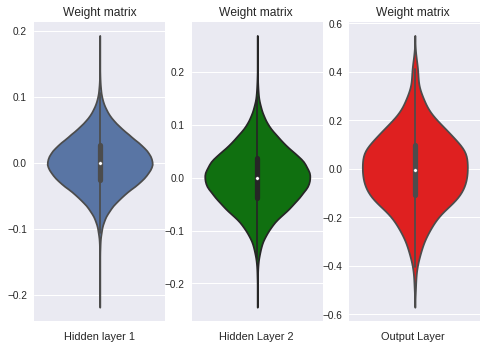

In [41]:
import seaborn as s

h1_w = w['h1'].flatten().reshape(-1,1)
h2_w = w['h2'].flatten().reshape(-1,1)
out_w = w['out'].flatten().reshape(-1,1)

fig = mp.figure()
mp.subplot(1,3,1)
mp.title("Weight matrix")
ax = s.violinplot(y = h1_w, clolr = 'b')
mp.xlabel("Hidden layer 1")


mp.subplot(1, 3, 2)
mp.title("Weight matrix ")
ax = s.violinplot(y=h2_w, color='g')
mp.xlabel('Hidden Layer 2 ')

mp.subplot(1, 3, 3)
mp.title("Weight matrix ")
ax = s.violinplot(y=out_w,color='r')
mp.xlabel('Output Layer ')
mp.show()

              MODEL 2: INPUT (784) - ReLu(512) - ReLu(128) - ReLu(output 10)
              
                            -> The activation functions are ReLu

In [0]:
def mulit_layer_perceptron(x,weights,biases):
  print('Input layer')
  print("X:", x.get_shape(), "W[h1]:", weights['h1'].get_shape(), 'b[h1]:', biases['b1'].get_shape())
  
  print('Hidden layer 1 with RELU Activation')
  layer_1 = tf.add(tf.matmul(x,weights['h1']),biases['b1'])
  layer_1 - tf.nn.relu(layer_1)
  print("Layer_1:", layer_1.get_shape(), 'W[h2]:', weights['h2'].get_shape, 'b[b1]:', biases['b2'].get_shape())
  
  print("Hidden layer 2 with RELU Activation")
  layer_2 = tf.add(tf.matmul(layer_1,weights['h2']),biases['b2'])
  layer_2 - tf.nn.relu(layer_2)
  print("Layer_2:", layer_2.get_shape(), 'W[out]:', weights['out'].get_shape, 'b3:', biases['out'].get_shape())  
  
  print("Output layer")
  output_layer = tf.matmul(layer_2,weights['out']) + biases['out']
  output_layer = tf.nn.relu(output_layer)
  print('Output Layer:', output_layer.get_shape())
  
  return output_layer
  
  

                MODEL 2 + ADAM Optimizer

                Input-ReLu(512)-ReLu(128)-Relu(output) - AdamOptimizer

Input layer
X: (?, 784) W[h1]: (784, 512) b[h1]: (512,)
Hidden layer 1 with RELU Activation
Layer_1: (?, 512) W[h2]: <bound method Variable.get_shape of <tf.Variable 'Variable_21:0' shape=(512, 128) dtype=float32_ref>> b[b1]: (128,)
Hidden layer 2 with RELU Activation
Layer_2: (?, 128) W[out]: <bound method Variable.get_shape of <tf.Variable 'Variable_22:0' shape=(128, 10) dtype=float32_ref>> b3: (10,)
Output layer
Output Layer: (?, 10)
Epoch: 0001 train cost=209.421812495 test cost=210.405454614
Epoch: 0002 train cost=2.302582741 test cost=2.302565488
Epoch: 0003 train cost=2.302582741 test cost=2.302571774
Epoch: 0004 train cost=2.302582741 test cost=2.302571774
Epoch: 0005 train cost=2.302582741 test cost=2.302571774
Epoch: 0006 train cost=2.302582741 test cost=2.302571774
Epoch: 0007 train cost=2.302582741 test cost=2.302571774
Epoch: 0008 train cost=2.302582741 test cost=2.302571774
Epoch: 0009 train cost=2.302582741 test cost=2.302571774
Epoch: 0010 train cost=2.302582741 test co

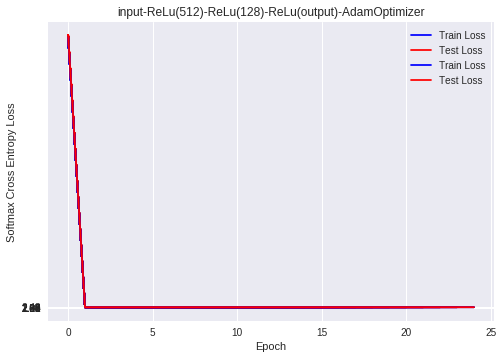

In [52]:
y_relu = mulit_layer_perceptron(x,relu_weights,biases)
cost_relu = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_relu, labels = y_))
adam_optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost_relu)
sgd_optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost_relu)

with tf.Session() as sess:
  tf.global_variables_initializer().run()
  fig,ax = mp.subplots(1,1)
  ax.set_xlabel('Epoch')
  ax.set_ylabel("Softmax Cross Entropy Loss")
  epchs, ytrainloss, ytestloss = [], [], []
  for epoch in range(training_epochs):
    train_avg_cost = 0
    test_avg_cost = 0
    number_of_batches = int(data.train.num_examples/batch_size)
    
    for i in range(number_of_batches):
      xs_batch, ys_batch = data.train.next_batch(batch_size)
      _,c,w = sess.run([adam_optimizer,cost_relu,relu_weights],feed_dict = {x:xs_batch, y_:ys_batch})
      train_avg_cost += c/number_of_batches
      c = sess.run(cost_relu, feed_dict = {x: data.test.images, y_: data.test.labels})
      test_avg_cost  += c/number_of_batches
    epchs.append(epoch)
    ytrainloss.append(train_avg_cost)
    ytestloss.append(test_avg_cost)
    dynamic_plot(epchs, ytrainloss, ytestloss, ax, np.arange(1.8, 2.5, step=0.07), "input-ReLu(512)-ReLu(128)-ReLu(output)-AdamOptimizer")
    
    if epoch%display_step == 0:
      print("Epoch:", '%04d' % (epoch+1), "train cost={:.9f}".format(train_avg_cost), "test cost={:.9f}".format(test_avg_cost))
    dynamic_plot(epchs, ytrainloss, ytestloss, ax, np.arange(1.8, 2.5, step=0.07), "input-ReLu(512)-ReLu(128)-ReLu(output)-AdamOptimizer")
  correct_prediction = tf.equal(tf.argmax(y_sgd,1), tf.argmax(y_,1))
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
  print("Accuracy:", accuracy.eval({x: data.test.images, y_: data.test.labels}))
    
      
    

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


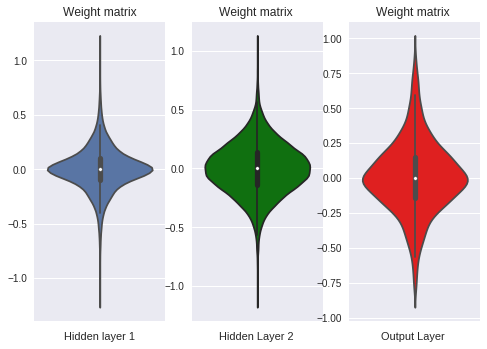

In [53]:
import seaborn as s

h1_w = w['h1'].flatten().reshape(-1,1)
h2_w = w['h2'].flatten().reshape(-1,1)
out_w = w['out'].flatten().reshape(-1,1)

fig = mp.figure()
mp.subplot(1,3,1)
mp.title("Weight matrix")
ax = s.violinplot(y = h1_w, clolr = 'b')
mp.xlabel("Hidden layer 1")


mp.subplot(1, 3, 2)
mp.title("Weight matrix ")
ax = s.violinplot(y=h2_w, color='g')
mp.xlabel('Hidden Layer 2 ')

mp.subplot(1, 3, 3)
mp.title("Weight matrix ")
ax = s.violinplot(y=out_w,color='r')
mp.xlabel('Output Layer ')
mp.show()

              MODEL 2 + GRADIENT DESCENT OPTIMIZER

Input layer
X: (?, 784) W[h1]: (784, 512) b[h1]: (512,)
Hidden layer 1 with RELU Activation
Layer_1: (?, 512) W[h2]: <bound method Variable.get_shape of <tf.Variable 'Variable_21:0' shape=(512, 128) dtype=float32_ref>> b[b1]: (128,)
Hidden layer 2 with RELU Activation
Layer_2: (?, 128) W[out]: <bound method Variable.get_shape of <tf.Variable 'Variable_22:0' shape=(128, 10) dtype=float32_ref>> b3: (10,)
Output layer
Output Layer: (?, 10)
Epoch: 0001 train cost=4.980333456 test cost=4.963308534
Epoch: 0002 train cost=1.904925619 test cost=1.912343695
Epoch: 0003 train cost=1.913920914 test cost=1.919963113
Epoch: 0004 train cost=1.906759251 test cost=1.914553289
Epoch: 0005 train cost=1.901835554 test cost=1.910970788
Epoch: 0006 train cost=1.902117114 test cost=1.909050426
Epoch: 0007 train cost=1.900284037 test cost=1.907728091
Epoch: 0008 train cost=1.898658954 test cost=1.906581226
Epoch: 0009 train cost=1.896835147 test cost=1.906401160
Epoch: 0010 train cost=1.896392504 test cost=1

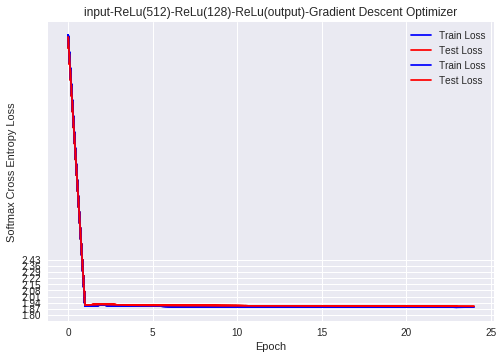

In [54]:
y_relu = mulit_layer_perceptron(x,relu_weights,biases)
cost_relu = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_relu, labels = y_))
adam_optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost_relu)
sgd_optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost_relu)

with tf.Session() as sess:
  tf.global_variables_initializer().run()
  fig,ax = mp.subplots(1,1)
  ax.set_xlabel('Epoch')
  ax.set_ylabel("Softmax Cross Entropy Loss")
  epchs, ytrainloss, ytestloss = [], [], []
  for epoch in range(training_epochs):
    train_avg_cost = 0
    test_avg_cost = 0
    number_of_batches = int(data.train.num_examples/batch_size)
    
    for i in range(number_of_batches):
      xs_batch, ys_batch = data.train.next_batch(batch_size)
      _,c,w = sess.run([sgd_optimizer,cost_relu,relu_weights],feed_dict = {x:xs_batch, y_:ys_batch})
      train_avg_cost += c/number_of_batches
      c = sess.run(cost_relu, feed_dict = {x: data.test.images, y_: data.test.labels})
      test_avg_cost  += c/number_of_batches
    epchs.append(epoch)
    ytrainloss.append(train_avg_cost)
    ytestloss.append(test_avg_cost)
    dynamic_plot(epchs, ytrainloss, ytestloss, ax, np.arange(1.8, 2.5, step=0.07), "input-ReLu(512)-ReLu(128)-ReLu(output)-Gradient Descent Optimizer")
    
    if epoch%display_step == 0:
      print("Epoch:", '%04d' % (epoch+1), "train cost={:.9f}".format(train_avg_cost), "test cost={:.9f}".format(test_avg_cost))
    dynamic_plot(epchs, ytrainloss, ytestloss, ax, np.arange(1.8, 2.5, step=0.07), "input-ReLu(512)-ReLu(128)-ReLu(output)-Gradient Descent Optimizer")
  correct_prediction = tf.equal(tf.argmax(y_sgd,1), tf.argmax(y_,1))
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
  print("Accuracy:", accuracy.eval({x: data.test.images, y_: data.test.labels}))
    
      
    

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


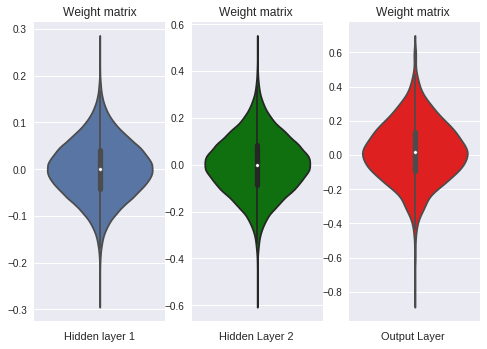

In [55]:
import seaborn as s

h1_w = w['h1'].flatten().reshape(-1,1)
h2_w = w['h2'].flatten().reshape(-1,1)
out_w = w['out'].flatten().reshape(-1,1)

fig = mp.figure()
mp.subplot(1,3,1)
mp.title("Weight matrix")
ax = s.violinplot(y = h1_w, clolr = 'b')
mp.xlabel("Hidden layer 1")


mp.subplot(1, 3, 2)
mp.title("Weight matrix ")
ax = s.violinplot(y=h2_w, color='g')
mp.xlabel('Hidden Layer 2 ')

mp.subplot(1, 3, 3)
mp.title("Weight matrix ")
ax = s.violinplot(y=out_w,color='r')
mp.xlabel('Output Layer ')
mp.show()

              MODEL 3: INPUT - SIGMOID(BatchNormalization(512)) - SIGMOID(BatchNormalization(128)) - SIGMOID(output)
              
              -> The activation functions are SIGMOID

In [0]:
eplsilon = 0.01
def mulit_layer_perceptron(x,weights,biases):
  print('Input layer')
  print("X:", x.get_shape(), "W[h1]:", weights['h1'].get_shape(), 'b[h1]:', biases['b1'].get_shape())
  
  print('Hidden layer 1 with Sigmoid Activation')
  layer_1 = tf.add(tf.matmul(x,weights['h1']),biases['b1'])
  mean_1, var_1 = tf.nn.moments(layer_1,[0])
  scale_1 = tf.Variable(tf.ones([n_hidden_1]))
  beta_1 = tf.Variable(tf.zeros([n_hidden_1]))
  layer_1 = tf.nn.batch_normalization(layer_1,mean_1, var_1, scale_1, beta_1,eplsilon)
  layer_1 - tf.nn.sigmoid(layer_1)
  print("Layer_1:", layer_1.get_shape(), 'W[h2]:', weights['h2'].get_shape, 'b[b1]:', biases['b2'].get_shape())
  
  print("Hidden layer 2 with Sigmoid Activation")
  layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
  mean_2, var_2 = tf.nn.moments(layer_2,[0])
  scale_2 = tf.Variable(tf.ones([n_hidden_2]))
  beta_2 = tf.Variable(tf.zeros([n_hidden_2]))
  layer_2 = tf.nn.batch_normalization(layer_2,mean_2, var_2, scale_2, beta_2,eplsilon)
  layer_2 - tf.nn.sigmoid(layer_2)
  print("Layer_2:", layer_2.get_shape(), 'W[out]:', weights['out'].get_shape, 'b3:', biases['out'].get_shape())  
  
  print("Output layer")
  output_layer = tf.matmul(layer_2,weights['out']) + biases['out']
  output_layer = tf.nn.sigmoid(output_layer)
  print('Output Layer:', output_layer.get_shape())
  
  return output_layer
  
  

               MODEL 3 + ADAM OPTIMIZER

Input layer
X: (?, 784) W[h1]: (784, 512) b[h1]: (512,)
Hidden layer 1 with Sigmoid Activation
Layer_1: (?, 512) W[h2]: <bound method Variable.get_shape of <tf.Variable 'Variable_27:0' shape=(512, 128) dtype=float32_ref>> b[b1]: (128,)
Hidden layer 2 with Sigmoid Activation
Layer_2: (?, 128) W[out]: <bound method Variable.get_shape of <tf.Variable 'Variable_28:0' shape=(128, 10) dtype=float32_ref>> b3: (10,)
Output layer
Output Layer: (?, 10)
Epoch: 0001 train cost=2.349449171 test cost=2.352906570
Epoch: 0002 train cost=2.342291914 test cost=2.345360127
Epoch: 0003 train cost=2.266466056 test cost=2.261591890
Epoch: 0004 train cost=1.829162110 test cost=1.825918247
Epoch: 0005 train cost=1.734419727 test cost=1.733736868
Epoch: 0006 train cost=1.710431199 test cost=1.710253932
Epoch: 0007 train cost=1.706800042 test cost=1.706654499
Epoch: 0008 train cost=1.699189143 test cost=1.704543404
Epoch: 0009 train cost=1.700946758 test cost=1.704560947
Epoch: 0010 train cost=1.703178620 test 

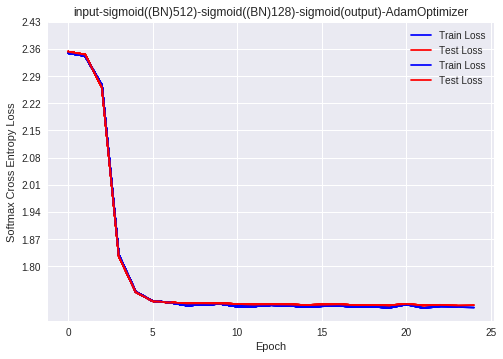

In [69]:
y_sgd = mulit_layer_perceptron(x,sgd_weights,biases)
cost_sgd = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_sgd, labels = y_))
adam_optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost_sgd)
sgd_optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost_sgd)

with tf.Session() as sess:
  tf.global_variables_initializer().run()
  fig,ax = mp.subplots(1,1)
  ax.set_xlabel('Epoch')
  ax.set_ylabel("Softmax Cross Entropy Loss")
  epchs, ytrainloss, ytestloss = [], [], []
  for epoch in range(training_epochs):
    train_avg_cost = 0
    test_avg_cost = 0
    number_of_batches = int(data.train.num_examples/batch_size)
    
    for i in range(number_of_batches):
      xs_batch, ys_batch = data.train.next_batch(batch_size)
      _,c,w = sess.run([adam_optimizer,cost_sgd,sgd_weights],feed_dict = {x:xs_batch, y_:ys_batch})
      train_avg_cost += c/number_of_batches
      c = sess.run(cost_sgd, feed_dict = {x: data.test.images, y_: data.test.labels})
      test_avg_cost  += c/number_of_batches
    epchs.append(epoch)
    ytrainloss.append(train_avg_cost)
    ytestloss.append(test_avg_cost)
    dynamic_plot(epchs, ytrainloss, ytestloss, ax, np.arange(1.8, 2.5, step=0.07), "input-sigmoid((BN)512)-sigmoid((BN)128)-sigmoid(output)-AdamOptimizer")
    
    if epoch%display_step == 0:
      print("Epoch:", '%04d' % (epoch+1), "train cost={:.9f}".format(train_avg_cost), "test cost={:.9f}".format(test_avg_cost))
    dynamic_plot(epchs, ytrainloss, ytestloss, ax, np.arange(1.8, 2.5, step=0.07), "input-sigmoid((BN)512)-sigmoid((BN)128)-sigmoid(output)-AdamOptimizer")
  correct_prediction = tf.equal(tf.argmax(y_sgd,1), tf.argmax(y_,1))
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
  print("Accuracy:", accuracy.eval({x: data.test.images, y_: data.test.labels}))
    
      
    

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


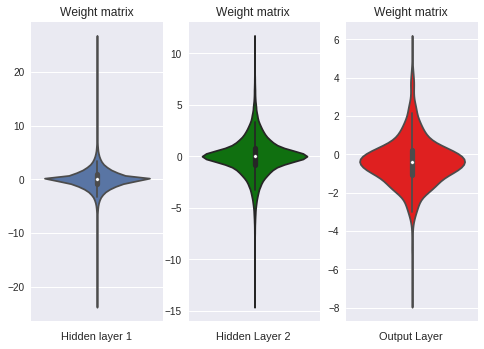

In [70]:
import seaborn as s

h1_w = w['h1'].flatten().reshape(-1,1)
h2_w = w['h2'].flatten().reshape(-1,1)
out_w = w['out'].flatten().reshape(-1,1)

fig = mp.figure()
mp.subplot(1,3,1)
mp.title("Weight matrix")
ax = s.violinplot(y = h1_w, clolr = 'b')
mp.xlabel("Hidden layer 1")


mp.subplot(1, 3, 2)
mp.title("Weight matrix ")
ax = s.violinplot(y=h2_w, color='g')
mp.xlabel('Hidden Layer 2 ')

mp.subplot(1, 3, 3)
mp.title("Weight matrix ")
ax = s.violinplot(y=out_w,color='r')
mp.xlabel('Output Layer ')
mp.show()

               MODEL 3 + GRADIENT DESCENT OPTIMIZER

Input layer
X: (?, 784) W[h1]: (784, 512) b[h1]: (512,)
Hidden layer 1 with Sigmoid Activation
Layer_1: (?, 512) W[h2]: <bound method Variable.get_shape of <tf.Variable 'Variable_27:0' shape=(512, 128) dtype=float32_ref>> b[b1]: (128,)
Hidden layer 2 with Sigmoid Activation
Layer_2: (?, 128) W[out]: <bound method Variable.get_shape of <tf.Variable 'Variable_28:0' shape=(128, 10) dtype=float32_ref>> b3: (10,)
Output layer
Output Layer: (?, 10)
Epoch: 0001 train cost=2.320533943 test cost=2.318185780
Epoch: 0002 train cost=2.305083630 test cost=2.303832847
Epoch: 0003 train cost=2.301661552 test cost=2.301160088
Epoch: 0004 train cost=2.301111967 test cost=2.301026752
Epoch: 0005 train cost=2.301475495 test cost=2.301105400
Epoch: 0006 train cost=2.301193979 test cost=2.301031264
Epoch: 0007 train cost=2.301438288 test cost=2.301095143
Epoch: 0008 train cost=2.301250159 test cost=2.301060295
Epoch: 0009 train cost=2.301365215 test cost=2.301036874
Epoch: 0010 train cost=2.301085242 test 

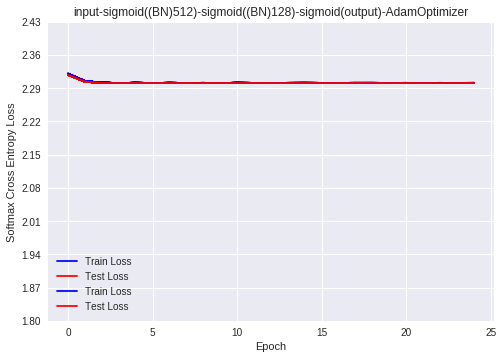

In [71]:
y_sgd = mulit_layer_perceptron(x,sgd_weights,biases)
cost_sgd = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_sgd, labels = y_))
adam_optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost_sgd)
sgd_optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost_sgd)

with tf.Session() as sess:
  tf.global_variables_initializer().run()
  fig,ax = mp.subplots(1,1)
  ax.set_xlabel('Epoch')
  ax.set_ylabel("Softmax Cross Entropy Loss")
  epchs, ytrainloss, ytestloss = [], [], []
  for epoch in range(training_epochs):
    train_avg_cost = 0
    test_avg_cost = 0
    number_of_batches = int(data.train.num_examples/batch_size)
    
    for i in range(number_of_batches):
      xs_batch, ys_batch = data.train.next_batch(batch_size)
      _,c,w = sess.run([sgd_optimizer,cost_sgd,sgd_weights],feed_dict = {x:xs_batch, y_:ys_batch})
      train_avg_cost += c/number_of_batches
      c = sess.run(cost_sgd, feed_dict = {x: data.test.images, y_: data.test.labels})
      test_avg_cost  += c/number_of_batches
    epchs.append(epoch)
    ytrainloss.append(train_avg_cost)
    ytestloss.append(test_avg_cost)
    dynamic_plot(epchs, ytrainloss, ytestloss, ax, np.arange(1.8, 2.5, step=0.07), "input-sigmoid((BN)512)-sigmoid((BN)128)-sigmoid(output)-AdamOptimizer")
    
    if epoch%display_step == 0:
      print("Epoch:", '%04d' % (epoch+1), "train cost={:.9f}".format(train_avg_cost), "test cost={:.9f}".format(test_avg_cost))
    dynamic_plot(epchs, ytrainloss, ytestloss, ax, np.arange(1.8, 2.5, step=0.07), "input-sigmoid((BN)512)-sigmoid((BN)128)-sigmoid(output)-AdamOptimizer")
  correct_prediction = tf.equal(tf.argmax(y_sgd,1), tf.argmax(y_,1))
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
  print("Accuracy:", accuracy.eval({x: data.test.images, y_: data.test.labels}))
    
      
    

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


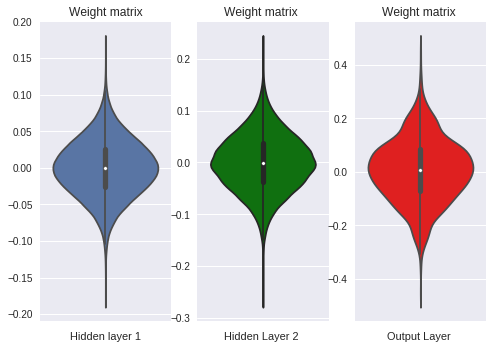

In [72]:
import seaborn as s

h1_w = w['h1'].flatten().reshape(-1,1)
h2_w = w['h2'].flatten().reshape(-1,1)
out_w = w['out'].flatten().reshape(-1,1)

fig = mp.figure()
mp.subplot(1,3,1)
mp.title("Weight matrix")
ax = s.violinplot(y = h1_w, clolr = 'b')
mp.xlabel("Hidden layer 1")


mp.subplot(1, 3, 2)
mp.title("Weight matrix ")
ax = s.violinplot(y=h2_w, color='g')
mp.xlabel('Hidden Layer 2 ')

mp.subplot(1, 3, 3)
mp.title("Weight matrix ")
ax = s.violinplot(y=out_w,color='r')
mp.xlabel('Output Layer ')
mp.show()

                            MODEL 4: INPUT - ReLu(Drop out(512)) - ReLu(Drop out(128)) - ReLu(output)
              
                                              -> The activation functions are ReLU

In [0]:
def mulit_layer_perceptron(x,weights,biases):
  print('Input layer')
  print("X:", x.get_shape(), "W[h1]:", weights['h1'].get_shape(), 'b[h1]:', biases['b1'].get_shape())
  
  print('Hidden layer 1 with RELU Activation')
  layer_1 = tf.add(tf.matmul(x,weights['h1']),biases['b1'])
  layer_1 - tf.nn.relu(layer_1)
  print("Layer_1:", layer_1.get_shape(), 'W[h2]:', weights['h2'].get_shape, 'b[b1]:', biases['b2'].get_shape())
  layer_1_drop = tf.nn.dropout(layer_1, keep_prob)
  
  print("Hidden layer 2 with RELU Activation")
  layer_2 = tf.add(tf.matmul(layer_1_drop,weights['h2']),biases['b2'])
  layer_2 - tf.nn.relu(layer_2)
  print("Layer_2:", layer_2.get_shape(), 'W[out]:', weights['out'].get_shape, 'b3:', biases['out'].get_shape())  
  layer_2_drop = tf.nn.dropout(layer_2, keep_prob)
  
  print("Output layer")
  output_layer = tf.matmul(layer_2_drop,weights['out']) + biases['out']
  output_layer = tf.nn.relu(output_layer)
  print('Output Layer:', output_layer.get_shape())
  
  return output_layer
  
  

               MODEL 4 + ADAM OPTIMIZER

Input layer
X: (?, 784) W[h1]: (784, 512) b[h1]: (512,)
Hidden layer 1 with RELU Activation
Layer_1: (?, 512) W[h2]: <bound method Variable.get_shape of <tf.Variable 'Variable_30:0' shape=(512, 128) dtype=float32_ref>> b[b1]: (128,)
Hidden layer 2 with RELU Activation
Layer_2: (?, 128) W[out]: <bound method Variable.get_shape of <tf.Variable 'Variable_31:0' shape=(128, 10) dtype=float32_ref>> b3: (10,)
Output layer
Output Layer: (?, 10)
Epoch: 0001 train cost=4.767311148 test cost=4.649149166
Epoch: 0002 train cost=2.302582741 test cost=2.302571774
Epoch: 0003 train cost=2.302582741 test cost=2.303704626
Epoch: 0004 train cost=2.302582741 test cost=2.305074540
Epoch: 0005 train cost=2.302582741 test cost=2.316208046
Epoch: 0006 train cost=2.302582741 test cost=2.310911512
Epoch: 0007 train cost=2.302582741 test cost=2.305555123
Epoch: 0008 train cost=2.302582741 test cost=2.302571774
Epoch: 0009 train cost=2.302582741 test cost=2.304625555
Epoch: 0010 train cost=2.302582741 test cost=2

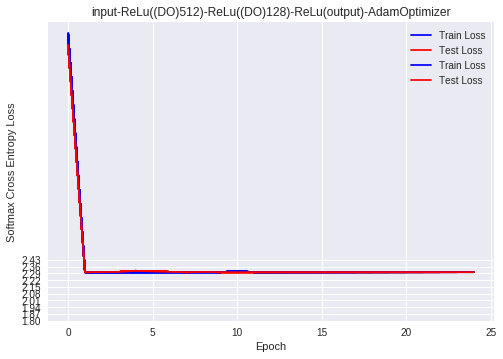

In [77]:
y_relu = mulit_layer_perceptron(x,relu_weights,biases)
cost_relu = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_relu, labels = y_))
adam_optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost_relu)
sgd_optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost_relu)

with tf.Session() as sess:
  tf.global_variables_initializer().run()
  fig,ax = mp.subplots(1,1)
  ax.set_xlabel('Epoch')
  ax.set_ylabel("Softmax Cross Entropy Loss")
  epchs, ytrainloss, ytestloss = [], [], []
  for epoch in range(training_epochs):
    train_avg_cost = 0
    test_avg_cost = 0
    number_of_batches = int(data.train.num_examples/batch_size)
    
    for i in range(number_of_batches):
      xs_batch, ys_batch = data.train.next_batch(batch_size)
      _,c,w = sess.run([adam_optimizer,cost_relu,relu_weights],feed_dict = {x:xs_batch, y_:ys_batch, keep_prob:0.5})
      train_avg_cost += c/number_of_batches
      c = sess.run(cost_relu, feed_dict = {x: data.test.images, y_: data.test.labels, keep_prob:0.5})
      test_avg_cost  += c/number_of_batches
    epchs.append(epoch)
    ytrainloss.append(train_avg_cost)
    ytestloss.append(test_avg_cost)
    dynamic_plot(epchs, ytrainloss, ytestloss, ax, np.arange(1.8, 2.5, step=0.07), "input-ReLu(512)-ReLu(128)-ReLu(output)-AdamOptimizer")
    
    if epoch%display_step == 0:
      print("Epoch:", '%04d' % (epoch+1), "train cost={:.9f}".format(train_avg_cost), "test cost={:.9f}".format(test_avg_cost))
    dynamic_plot(epchs, ytrainloss, ytestloss, ax, np.arange(1.8, 2.5, step=0.07), "input-ReLu((DO)512)-ReLu((DO)128)-ReLu(output)-AdamOptimizer")
  correct_prediction = tf.equal(tf.argmax(y_sgd,1), tf.argmax(y_,1))
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
  print("Accuracy:", accuracy.eval({x: data.test.images, y_: data.test.labels, keep_prob:0.5}))
    
      
    

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


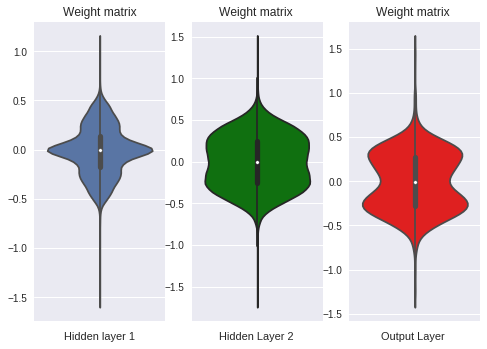

In [78]:
import seaborn as s

h1_w = w['h1'].flatten().reshape(-1,1)
h2_w = w['h2'].flatten().reshape(-1,1)
out_w = w['out'].flatten().reshape(-1,1)

fig = mp.figure()
mp.subplot(1,3,1)
mp.title("Weight matrix")
ax = s.violinplot(y = h1_w, clolr = 'b')
mp.xlabel("Hidden layer 1")


mp.subplot(1, 3, 2)
mp.title("Weight matrix ")
ax = s.violinplot(y=h2_w, color='g')
mp.xlabel('Hidden Layer 2 ')

mp.subplot(1, 3, 3)
mp.title("Weight matrix ")
ax = s.violinplot(y=out_w,color='r')
mp.xlabel('Output Layer ')
mp.show()

              MODEL 4 + GRADIENT DESCENT OPTIMIZER

Input layer
X: (?, 784) W[h1]: (784, 512) b[h1]: (512,)
Hidden layer 1 with RELU Activation
Layer_1: (?, 512) W[h2]: <bound method Variable.get_shape of <tf.Variable 'Variable_30:0' shape=(512, 128) dtype=float32_ref>> b[b1]: (128,)
Hidden layer 2 with RELU Activation
Layer_2: (?, 128) W[out]: <bound method Variable.get_shape of <tf.Variable 'Variable_31:0' shape=(128, 10) dtype=float32_ref>> b3: (10,)
Output layer
Output Layer: (?, 10)
Epoch: 0001 train cost=2.572081514 test cost=2.416359403
Epoch: 0002 train cost=2.304764600 test cost=2.305176154
Epoch: 0003 train cost=2.303997738 test cost=2.303121476
Epoch: 0004 train cost=2.295936758 test cost=2.296186772
Epoch: 0005 train cost=2.242655997 test cost=2.247438860
Epoch: 0006 train cost=2.196123284 test cost=2.196128598
Epoch: 0007 train cost=2.168153858 test cost=2.172993187
Epoch: 0008 train cost=2.155915421 test cost=2.158906438
Epoch: 0009 train cost=2.148236782 test cost=2.150557015
Epoch: 0010 train cost=2.137970213 test cost=2

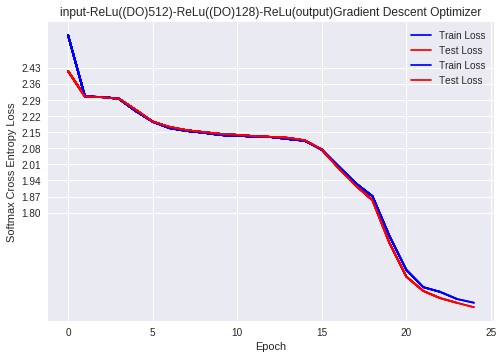

In [81]:
y_relu = mulit_layer_perceptron(x,relu_weights,biases)
cost_relu = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_relu, labels = y_))
adam_optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost_relu)
sgd_optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost_relu)

with tf.Session() as sess:
  tf.global_variables_initializer().run()
  fig,ax = mp.subplots(1,1)
  ax.set_xlabel('Epoch')
  ax.set_ylabel("Softmax Cross Entropy Loss")
  epchs, ytrainloss, ytestloss = [], [], []
  for epoch in range(training_epochs):
    train_avg_cost = 0
    test_avg_cost = 0
    number_of_batches = int(data.train.num_examples/batch_size)
    
    for i in range(number_of_batches):
      xs_batch, ys_batch = data.train.next_batch(batch_size)
      _,c,w = sess.run([sgd_optimizer,cost_relu,relu_weights],feed_dict = {x:xs_batch, y_:ys_batch, keep_prob:0.5})
      train_avg_cost += c/number_of_batches
      c = sess.run(cost_relu, feed_dict = {x: data.test.images, y_: data.test.labels, keep_prob:0.5})
      test_avg_cost  += c/number_of_batches
    epchs.append(epoch)
    ytrainloss.append(train_avg_cost)
    ytestloss.append(test_avg_cost)
    dynamic_plot(epchs, ytrainloss, ytestloss, ax, np.arange(1.8, 2.5, step=0.07), "input-ReLu((DO)512)-ReLu((DO)128)-ReLu(output)-Gradient Descent Optimizer")
    
    if epoch%display_step == 0:
      print("Epoch:", '%04d' % (epoch+1), "train cost={:.9f}".format(train_avg_cost), "test cost={:.9f}".format(test_avg_cost))
    dynamic_plot(epchs, ytrainloss, ytestloss, ax, np.arange(1.8, 2.5, step=0.07), "input-ReLu((DO)512)-ReLu((DO)128)-ReLu(output)Gradient Descent Optimizer")
  correct_prediction = tf.equal(tf.argmax(y_sgd,1), tf.argmax(y_,1))
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
  print("Accuracy:", accuracy.eval({x: data.test.images, y_: data.test.labels, keep_prob:0.5}))
    
      
    

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


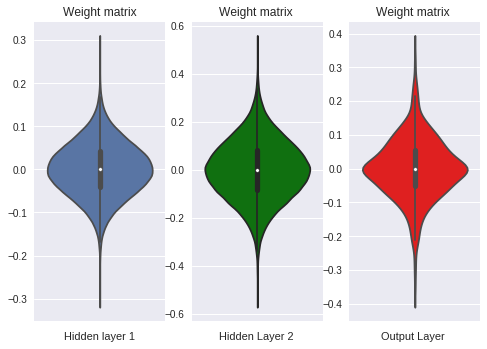

In [82]:
import seaborn as s

h1_w = w['h1'].flatten().reshape(-1,1)
h2_w = w['h2'].flatten().reshape(-1,1)
out_w = w['out'].flatten().reshape(-1,1)

fig = mp.figure()
mp.subplot(1,3,1)
mp.title("Weight matrix")
ax = s.violinplot(y = h1_w, clolr = 'b')
mp.xlabel("Hidden layer 1")


mp.subplot(1, 3, 2)
mp.title("Weight matrix ")
ax = s.violinplot(y=h2_w, color='g')
mp.xlabel('Hidden Layer 2 ')

mp.subplot(1, 3, 3)
mp.title("Weight matrix ")
ax = s.violinplot(y=out_w,color='r')
mp.xlabel('Output Layer ')
mp.show()

              CONCLUSION:
              
                          -> MODEL 1 
                                
                                   -> SIGMOID ACTIVATION FUNCTIONS
                                   
                                           -> ADAM OPTIMIZER 
                                           
                                                   -> TRAIN LOSS  - 2.4163
                                                   -> TEST LOSS   - 2.4146
                                                   -> ACCURACY    - 10.32
                                           
                                           -> GRADIENT DESCENT OPTIMIZER
                                           
                                                  -> TRAIN LOSS  - 1.5983
                                                  -> TEST LOSS   - 1.5925
                                                  -> ACCURACY    - 89.36
                                                  
                           -> MODEL 2
                           
                                    -> RELU ACTIVATION FUNCTIONS
                                    
                                          -> ADAM OPTIMIZER
                                          
                                                 -> TRAIN LOSS  - 2.3625
                                                 -> TEST LOSS   - 2.3025
                                                 -> ACCURACY    - 9.59
                                                 
                                           -> GRADIENT DESCENT OPTIMIZER
                                           
                                                  -> TRAIN LOSS  - 1.8910
                                                  -> TEST LOSS   - 1.8998
                                                  -> ACCURACY    - 9.54
                                                  
                            -> MODEL 3
                            
                                      -> SIGMOID ACTIVATION FUNCTIONS WITH BATCH NORMALIZATION
                                      
                                             -> ADAM OPTIMIZER
                                             
                                                    -> TRAIN LOSS  - 1.6936
                                                    -> TEST LOSS   - 1.70007
                                                    -> ACCURACY    - 72.94
                                                    
                                              -> GRADIENT DESCENT OPTIMIZER
                                              
                                                    -> TRAIN LOSS  - 2.3016
                                                    -> TEST LOSS   - 2.3010
                                                    -> ACCURACY    - 11.35
                                                    
                              -> MODEL 4
                              
                                        -> RELU ACTIVATION FUNCTION WITH DROP OUT
                                        
                                                -> ADAM OPTIMIZER
                                                
                                                        -> TRAIN LOSS  - 2.3025
                                                        -> TEST LOSS   - 2.3025
                                                        -> ACCURACY    - 8.92
                                                        
                                                 -> GRADIENT DESCENT OPTIMIZER
                                                 
                                                        -> TRAIN LOSS  - 1.4071
                                                        -> TEST LOSS   - 1.3877
                                                        -> ACCURACY    - 10.28
                                                  